In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dust = pd.read_excel('dust.xlsx')
dust.shape
dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [2]:
dust.info()
dust.describe()
dust.columns = ['date','SO2','CO','O3','NO2','PM10','PM2.5']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [3]:
dust['date'] = dust['date'].str[:11] 

In [4]:
dust['date'] = pd.to_datetime(dust['date'])
dust.dtypes #열의 데이터 타입 확인

date     datetime64[ns]
SO2             float64
CO              float64
O3              float64
NO2             float64
PM10            float64
PM2.5           float64
dtype: object

In [5]:
dust['year'] = dust['date'].dt.year #새로운 열 추가 그리고 값 넣기
dust['month'] = dust['date'].dt.month
dust['day'] = dust['date'].dt.day
dust.columns #열 확인
dust.head()

,date,SO2,CO,O3,NO2,PM10,PM2.5,year,month,day
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0,2021,1,1
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0,2021,1,1
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0,2021,1,1
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0,2021,1,1
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0,2021,1,1


In [6]:
dust = dust[['date','year','month','day','SO2','CO','O3','NO2','PM10','PM2.5']] 
#열순서바꾸기

dust.columns

Index(['date', 'year', 'month', 'day', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM2.5'],
      dtype='object')

In [7]:
dust.isnull().sum()#결측치확인

date      0
year      0
month     0
day       0
SO2       4
CO        4
O3        4
NO2       4
PM10     19
PM2.5     5
dtype: int64

In [8]:
#시계열 분석이므로 null값을 이전 시간의 값을 기준으로 채워줌
#결측값을 앞 방향 혹은 뒷 방향으로 채우기
dust= dust.fillna(method='pad')
dust.head()

,date,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [9]:
# 이전값이 없는 경우의 nan은 20으로 채움
dust.fillna(20,inplace=True)
dust.head()

,date,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [10]:
weather = pd.read_excel('weather.xlsx')

weather.head()
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


In [11]:
weather.drop(['지점','지점명'],axis=1,inplace=True)
weather.head()
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       743 non-null    datetime64[ns]
 1   기온(°C)   743 non-null    float64       
 2   풍속(m/s)  743 non-null    float64       
 3   강수량(mm)  743 non-null    float64       
 4   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.1 KB


In [12]:
weather.columns=['date','temp','wind','rain','humid']
weather['date'] = pd.to_datetime(weather['date']).dt.date 
# 시간값을 날리기 위해 위 코드로 변경하면 데이터타입이 object로 바뀜 
weather['date'] = pd.to_datetime(weather['date'])
# 그래서 위 코드를 사용해서 다시 datetime 타입으로 변경해줌
weather.info()
weather.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.1 KB


date     0
temp     0
wind     0
rain     0
humid    0
dtype: int64

In [13]:
weather['rain'] = np.where(weather['rain'] == 0, 0.01, weather['rain'])
#weather['rain'] =weather['rain'].replace([0],0.01) 
print(weather.head())
weather['rain'].value_counts()
dust.info()

        date  temp  wind  rain  humid
0 2021-01-01  -7.2   0.6  0.01   57.5
1 2021-01-01  -7.6   0.7  0.01   57.5
2 2021-01-01  -8.2   0.6  0.01   62.0
3 2021-01-01  -8.1   0.5  0.01   60.5
4 2021-01-01  -8.7   1.3  0.01   66.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   year    744 non-null    int32         
 2   month   744 non-null    int32         
 3   day     744 non-null    int32         
 4   SO2     744 non-null    float64       
 5   CO      744 non-null    float64       
 6   O3      744 non-null    float64       
 7   NO2     744 non-null    float64       
 8   PM10    744 non-null    float64       
 9   PM2.5   744 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int32(3)
memory usage: 49.5 KB


In [14]:
dust.drop(index=743,inplace=True)
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   year    743 non-null    int32         
 2   month   743 non-null    int32         
 3   day     743 non-null    int32         
 4   SO2     743 non-null    float64       
 5   CO      743 non-null    float64       
 6   O3      743 non-null    float64       
 7   NO2     743 non-null    float64       
 8   PM10    743 non-null    float64       
 9   PM2.5   743 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int32(3)
memory usage: 49.5 KB


In [15]:

con = pd.concat([dust,weather],axis=1)
con

,date,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5,date,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,2021-01-01,-7.2,0.6,0.01,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0,2021-01-01,-7.6,0.7,0.01,57.5
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0,2021-01-01,-8.2,0.6,0.01,62.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0,2021-01-01,-8.1,0.5,0.01,60.5
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0,2021-01-01,-8.7,1.3,0.01,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2021-01-31,2021,1,31,0.004,0.6,0.014,0.044,45.0,19.0,2021-01-31,7.4,0.6,0.01,51.0
739,2021-01-31,2021,1,31,0.004,0.7,0.002,0.057,45.0,23.0,2021-01-31,6.5,1.0,0.01,59.4
740,2021-01-31,2021,1,31,0.004,0.8,0.001,0.059,48.0,27.0,2021-01-31,7.7,1.0,0.01,60.3
741,2021-01-31,2021,1,31,0.003,1.0,0.001,0.061,46.0,26.0,2021-01-31,6.8,0.6,0.01,63.7


In [16]:
corr = con.corr() ## +0.7~ +1.0 강한 상관관계
## 0.3~0.7 뚜렷한 상관관계
## 0.1~0.3 거의 남남

In [17]:
con['PM10'].sort_values(ascending=False)

311    163.0
312    154.0
310    140.0
302    106.0
313    105.0
       ...  
555      5.0
535      4.0
536      3.0
395      3.0
551      3.0
Name: PM10, Length: 743, dtype: float64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humid'}>, <Axes: >]], dtype=object)

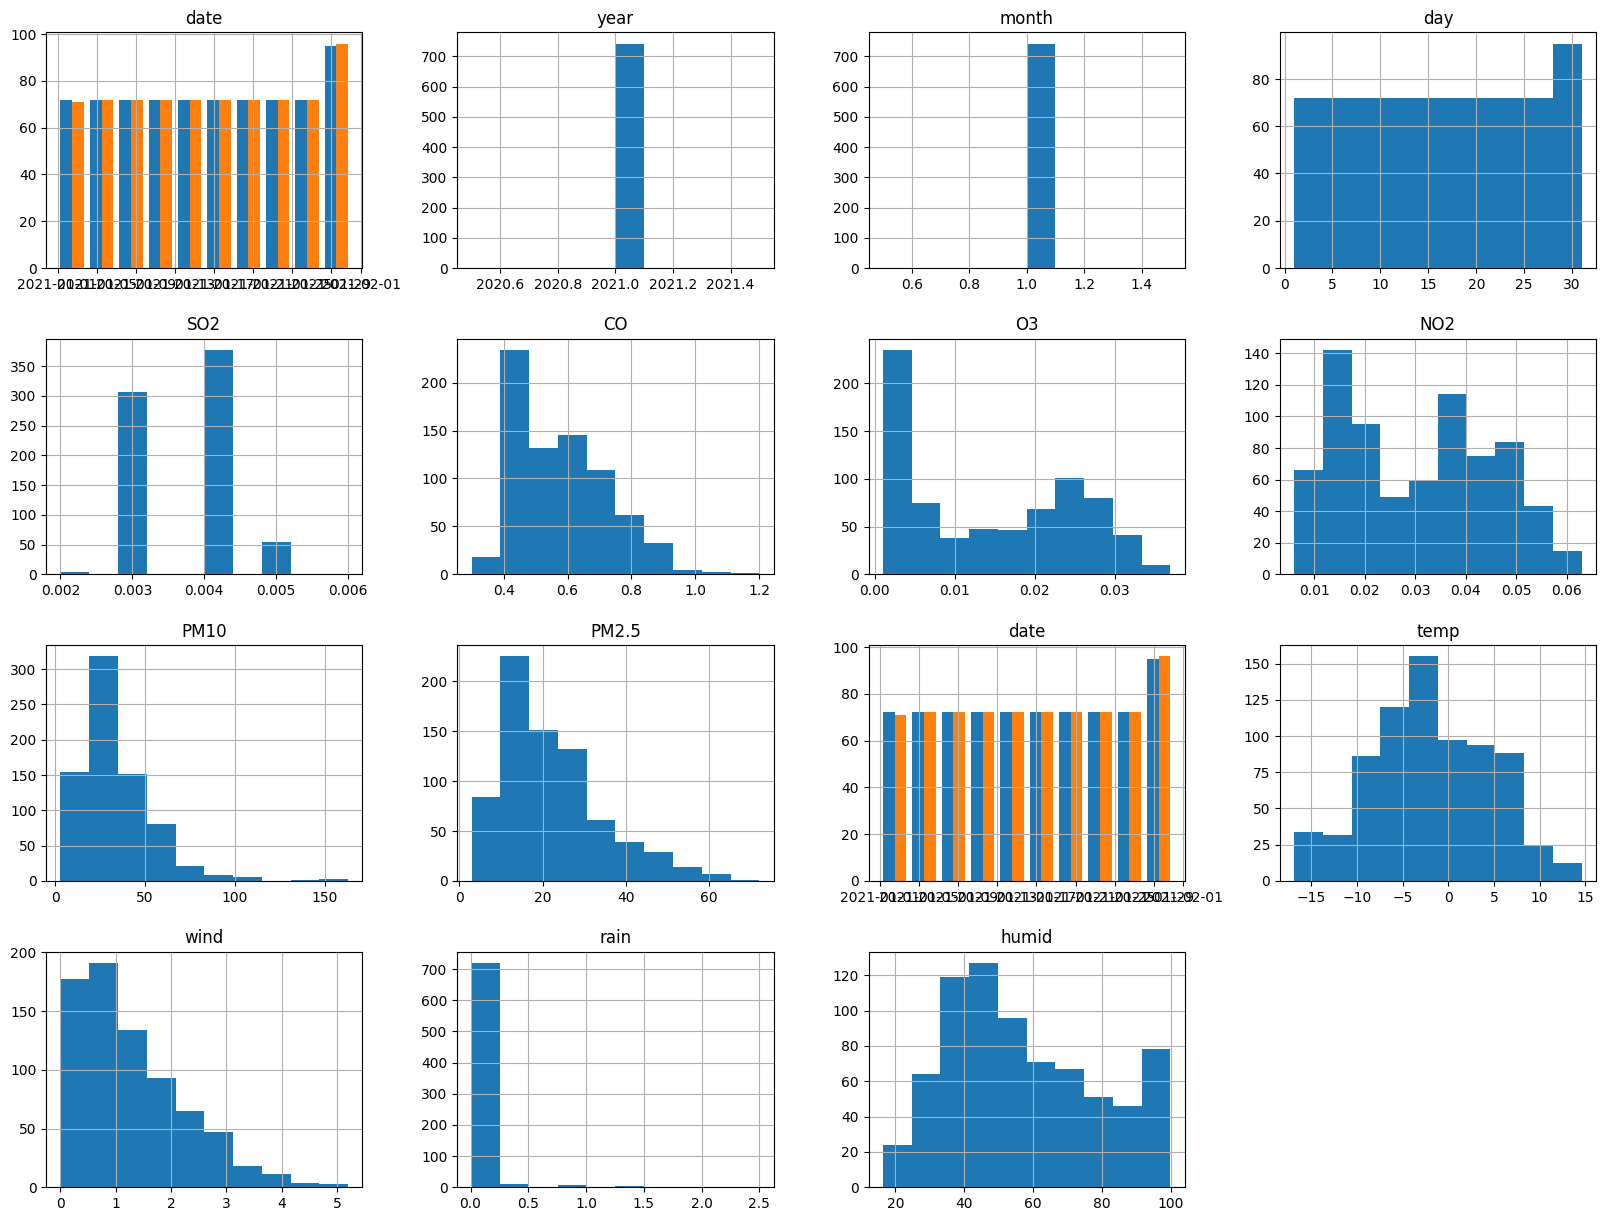

In [18]:
con.hist(figsize=(20,15))

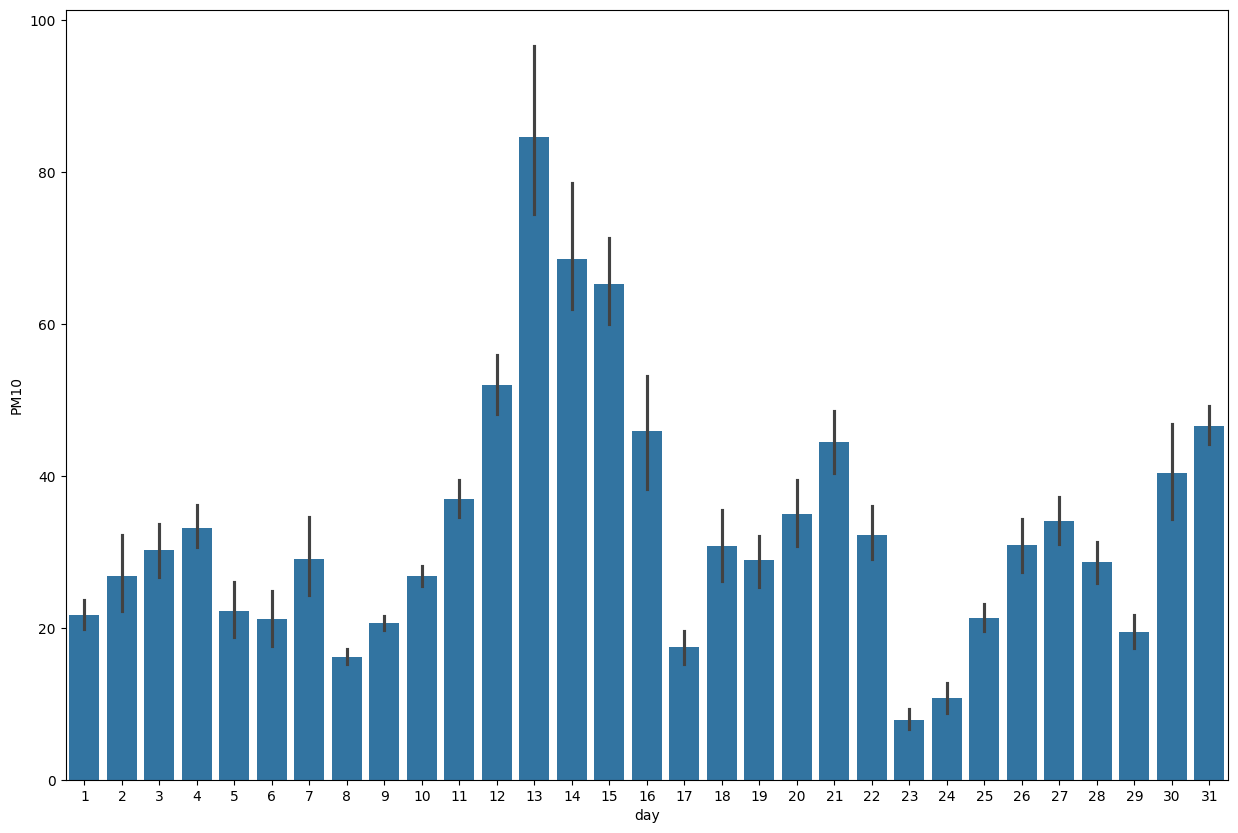

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
daygraph = sns.barplot(x='day',y='PM10',data = con)
plt.xticks(rotation=0)
plt.show()

<Axes: >

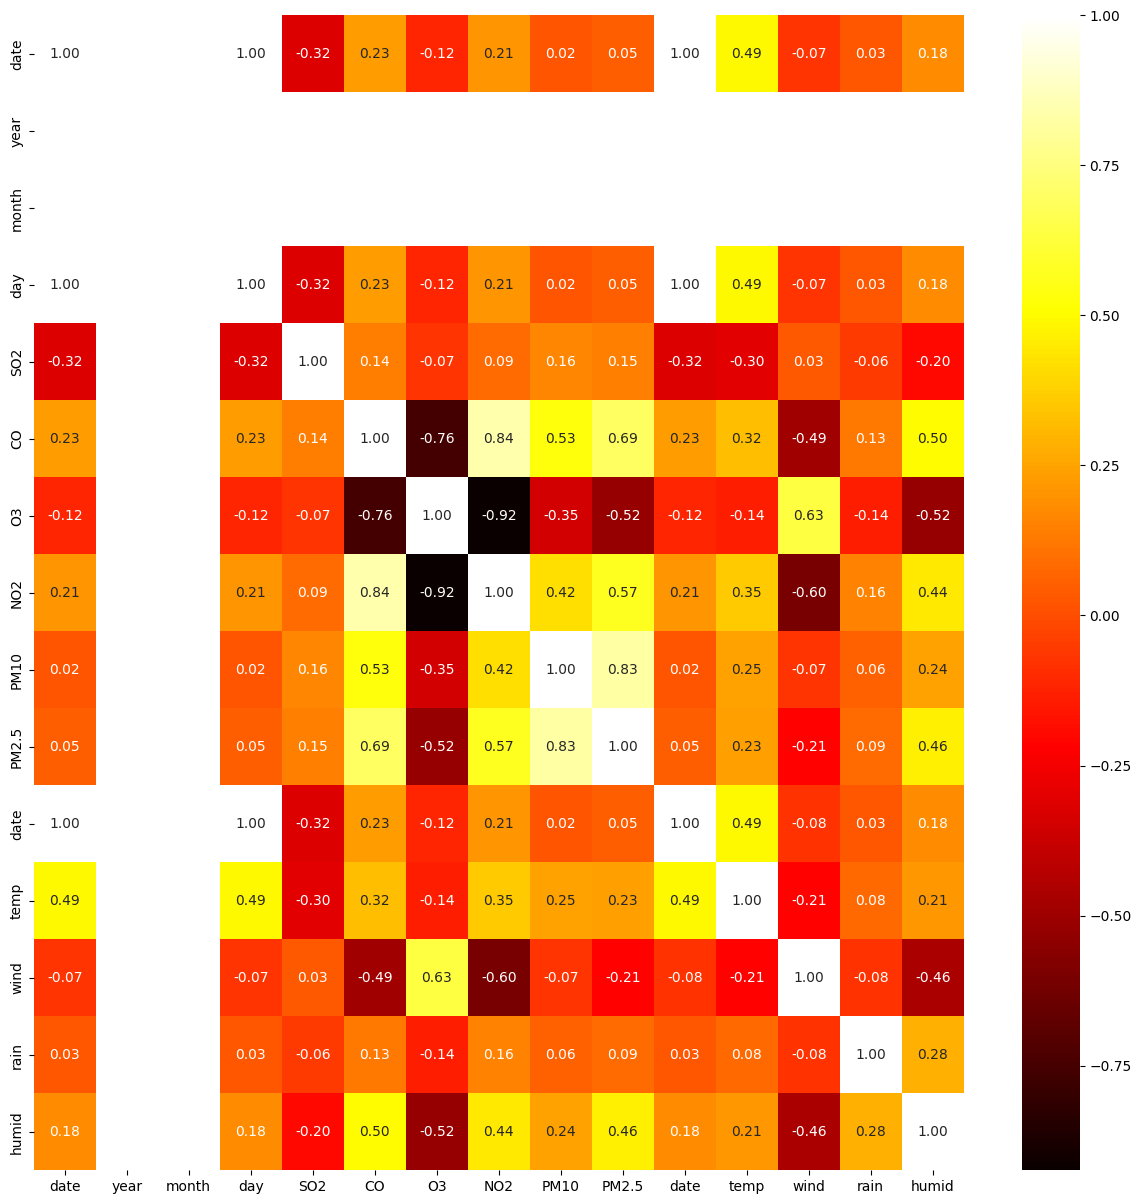

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True,fmt='.2f',cmap='hot')

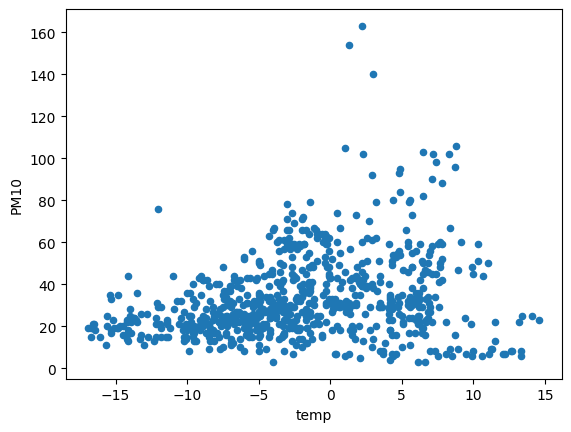

In [21]:
con.plot(x='temp',y='PM10',kind='scatter') # scatter  > 산점도
plt.show() # 결과물이 관계가 거의 없음

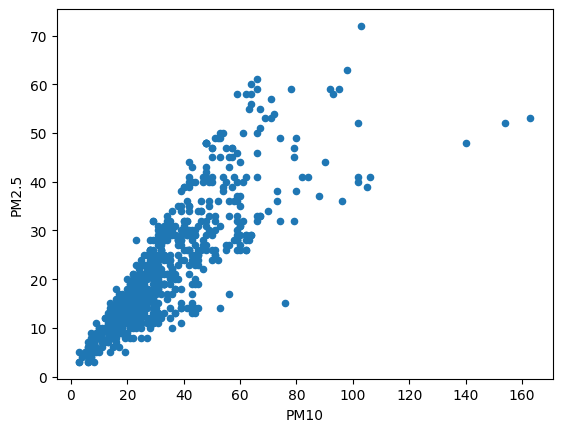

In [22]:
con.plot(x='PM10',y='PM2.5',kind='scatter') # scatter  > 산점도
plt.show() #상관있음

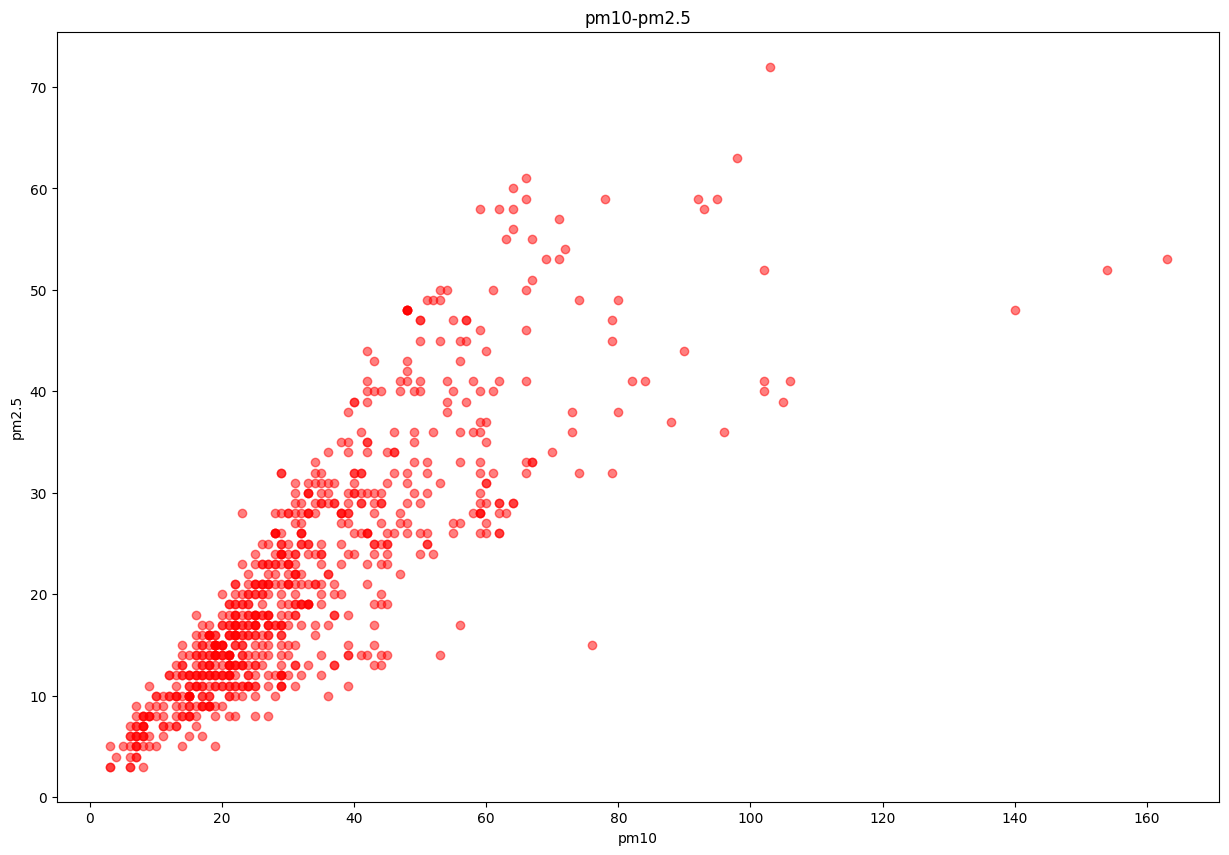

In [23]:
plt.figure(figsize=(15,10))
x=con['PM10'] #미세먼지
y=con['PM2.5']#초미세먼지
plt.plot(x,y,marker='o',linestyle='none',color='red',alpha=0.5)
plt.title('pm10-pm2.5')
plt.xlabel('pm10')
plt.ylabel('pm2.5')
plt.show()

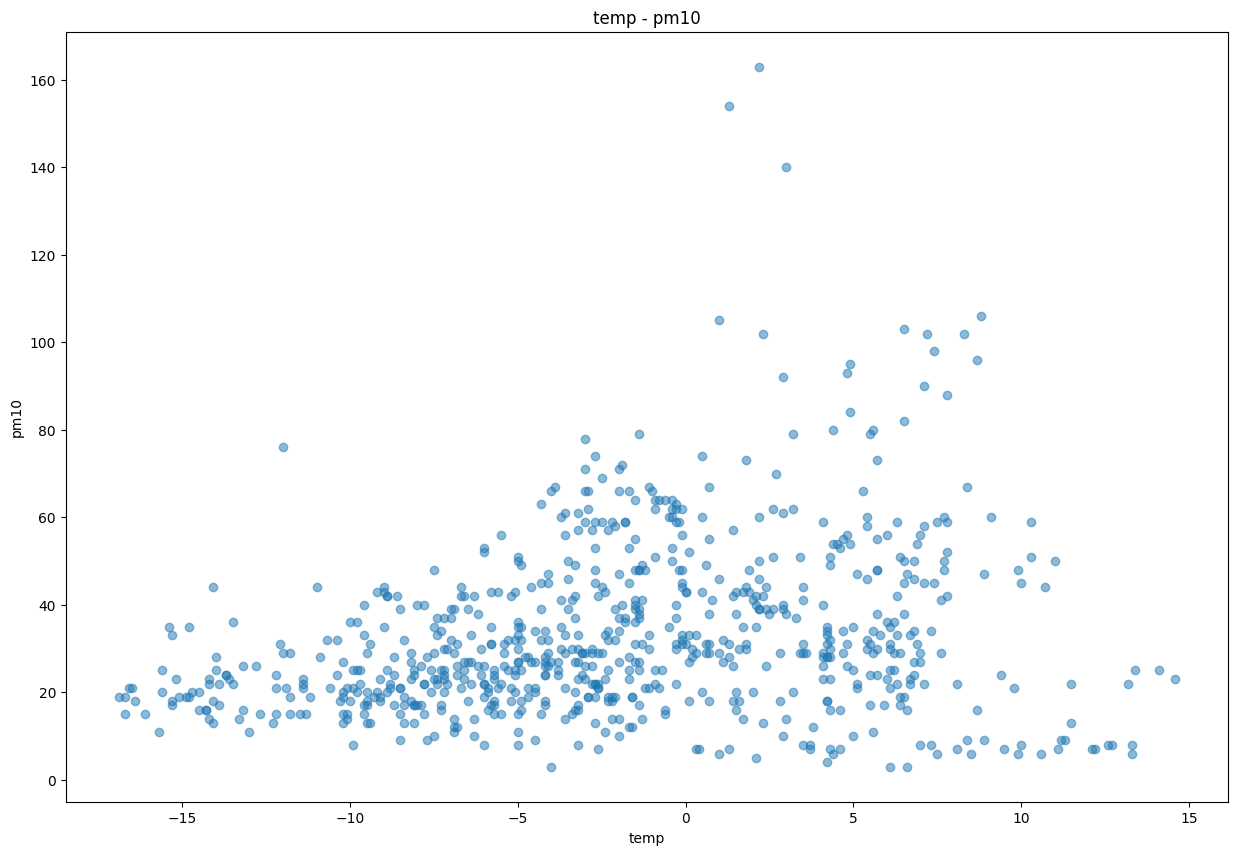

In [24]:
plt.figure(figsize=(15,10))
x=con['temp'] #온도
y=con['PM10'] #미세먼지
plt.plot(x,y,marker='o',linestyle='none',alpha=0.5)
plt.title('temp - pm10')
plt.xlabel('temp')
plt.ylabel('pm10')
plt.show()